In [73]:
import pandas
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [74]:
dataset = pandas.read_csv("datasets/sensor_readings_24.csv")
dataset.sample(10)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
3545,1.694,2.642,1.958,1.927,1.920,1.929,2.476,1.973,2.061,2.035,...,5.000,1.485,5.000,2.134,0.625,1.692,1.677,1.670,1.680,Move-Forward
3365,0.736,0.763,1.493,2.064,2.923,5.000,5.000,1.609,5.000,1.556,...,0.748,0.736,0.741,0.767,1.079,0.737,0.720,0.709,0.718,Move-Forward
2726,2.189,1.711,1.623,1.707,1.150,1.138,1.181,1.194,1.475,1.490,...,3.622,5.000,0.970,5.000,4.433,3.714,5.000,2.626,2.586,Sharp-Right-Turn
81,0.977,1.018,1.028,4.644,3.944,5.000,2.868,2.842,2.671,2.666,...,1.129,0.883,0.595,0.576,0.567,0.578,5.000,0.937,0.945,Move-Forward
2087,0.821,2.238,2.249,5.000,5.000,2.294,3.264,2.991,4.123,3.283,...,0.977,0.793,0.720,0.710,0.685,0.708,5.000,5.000,1.991,Move-Forward
4728,1.370,1.398,1.415,1.963,1.757,3.216,5.000,3.910,5.000,5.000,...,0.602,0.491,0.485,0.492,0.616,0.544,1.110,1.367,1.360,Sharp-Right-Turn
3683,1.259,4.053,1.311,5.000,2.767,2.318,2.361,1.646,4.909,0.898,...,0.674,0.641,0.654,0.704,5.000,1.159,1.176,1.242,1.242,Sharp-Right-Turn
2748,2.604,2.592,2.485,2.366,1.743,1.557,1.202,1.183,5.000,1.308,...,5.000,5.000,1.018,5.000,0.928,5.000,5.000,3.694,2.639,Sharp-Right-Turn
1744,2.590,2.644,2.443,1.380,1.353,1.330,1.319,1.330,1.618,1.617,...,0.857,0.924,0.797,0.789,5.000,4.379,3.599,3.657,2.603,Sharp-Right-Turn
825,2.508,2.527,2.001,2.060,1.722,1.326,1.317,1.326,1.462,1.663,...,5.000,0.976,0.992,0.800,2.382,4.316,4.771,3.574,2.519,Move-Forward


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

In [76]:
dataset.dropna(subset=["funcao_robo"], inplace=True)

In [77]:
dataset["funcao_robo"].info()

<class 'pandas.core.series.Series'>
Int64Index: 5442 entries, 0 to 5455
Series name: funcao_robo
Non-Null Count  Dtype 
--------------  ----- 
5442 non-null   object
dtypes: object(1)
memory usage: 85.0+ KB


In [78]:
dataset[dataset.isnull().any(axis=1)]

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
27,0.481,0.511,5.023,3.665,2.954,2.937,2.941,2.627,1.707,2.312,...,0.687,0.545,0.475,0.475,0.504,0.463,0.458,0.470,0.477,Slight-Right-Turn
30,0.482,0.525,0.524,3.665,2.953,2.940,2.940,2.630,1.709,2.311,...,0.563,0.542,0.475,0.476,0.488,0.464,0.459,0.468,0.478,Slight-Right-Turn
94,1.213,1.246,1.271,4.666,4.075,5.000,2.776,2.750,2.499,1.650,...,0.893,1.165,0.828,0.661,0.652,0.662,5.000,1.176,1.172,Sharp-Right-Turn
95,1.227,1.263,NaN,4.668,4.098,5.000,2.769,2.743,2.487,1.634,...,0.876,0.906,0.823,0.671,0.658,0.669,0.829,1.197,1.193,Sharp-Right-Turn
107,1.249,1.269,1.318,1.335,4.896,4.763,5.000,2.733,2.467,2.453,...,0.851,1.127,1.127,0.687,0.664,0.696,0.777,5.000,1.239,Sharp-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,1.826,1.807,1.582,1.267,1.256,1.271,1.564,NaN,1.579,0.825,...,4.234,0.862,5.000,4.413,3.663,2.634,2.621,2.607,2.531,Sharp-Right-Turn
5381,2.227,1.817,1.803,1.501,1.274,1.266,NaN,1.323,1.185,0.931,...,0.982,0.857,0.849,5.000,4.408,3.647,5.000,2.608,2.599,Sharp-Right-Turn
5423,4.847,3.620,5.000,2.646,2.642,NaN,1.917,1.891,4.857,1.386,...,0.793,0.790,0.798,0.884,0.849,0.885,5.000,0.703,5.000,Sharp-Right-Turn
5436,4.454,3.705,3.741,2.683,2.673,2.717,2.497,1.341,1.317,1.293,...,0.760,0.749,0.759,5.000,0.903,5.000,2.799,2.005,NaN,Move-Forward


In [79]:
# Temos quatro classes
dataset["funcao_robo"].unique()

array(['Slight-Right-Turn', 'Sharp-Right-Turn', 'Move-Forward',
       'Slight-Left-Turn'], dtype=object)

In [80]:
# Percebemos alguns dados faltantes em algumas filas aleatorias e decidimos preencher esses dados com KNNImputer
labels = dataset["funcao_robo"]

na_imputer = KNNImputer(n_neighbors=3, weights="uniform")
filled_dataset = na_imputer.fit_transform(dataset.drop(["funcao_robo"], axis=1))

dataset = pandas.DataFrame(filled_dataset)
dataset["labels"] = labels
dataset

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,labels
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5438,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Move-Forward
5439,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Move-Forward
5440,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [81]:
# Agora não temos mais dados faltantes S2
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5442 non-null   float64
 1   1       5442 non-null   float64
 2   2       5442 non-null   float64
 3   3       5442 non-null   float64
 4   4       5442 non-null   float64
 5   5       5442 non-null   float64
 6   6       5442 non-null   float64
 7   7       5442 non-null   float64
 8   8       5442 non-null   float64
 9   9       5442 non-null   float64
 10  10      5442 non-null   float64
 11  11      5442 non-null   float64
 12  12      5442 non-null   float64
 13  13      5442 non-null   float64
 14  14      5442 non-null   float64
 15  15      5442 non-null   float64
 16  16      5442 non-null   float64
 17  17      5442 non-null   float64
 18  18      5442 non-null   float64
 19  19      5442 non-null   float64
 20  20      5442 non-null   float64
 21  21      5442 non-null   float64
 22  

In [82]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,...,5442.00000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,1.470583,2.324720,2.488896,2.795224,2.956295,2.892110,3.352508,2.540977,3.126274,2.832604,...,2.20707,1.200545,0.990157,0.910446,1.058238,1.075819,1.016872,1.778887,1.554509,1.577777
std,0.801817,1.407915,1.247414,1.309497,1.338568,1.281516,1.413151,1.111888,1.356732,1.307898,...,1.71582,1.096267,0.941726,0.890034,1.144665,1.139782,0.888491,1.572032,1.289668,1.149740
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.49500,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.539250,1.729000,1.773000,1.785250,1.931000,1.618000,1.800000,1.636000,...,0.86100,0.690000,0.581000,0.530000,0.524000,0.542000,0.567000,0.743000,0.791250,0.884000
50%,1.334000,1.903500,2.063000,2.455500,2.666000,2.681500,3.226000,2.173000,2.802000,2.679500,...,1.32850,0.803000,0.738000,0.684000,0.690500,0.693000,0.764000,1.030000,1.071500,1.289000
75%,1.811500,2.675000,2.739750,4.092750,4.314000,3.830500,5.000000,3.193000,5.000000,3.531500,...,4.43675,1.158000,0.913000,0.837000,0.857000,0.862750,1.003750,2.071750,1.562750,1.657000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [83]:
# Nao sabemos que fazer com esses outliers, nos perdoe professor
outliers_identifier = LocalOutlierFactor(n_neighbors=3)
outliers = outliers_identifier.fit_predict(dataset.drop(["labels"], axis=1))

pandas.Series(outliers).value_counts()

 1    4258
-1    1184
dtype: int64

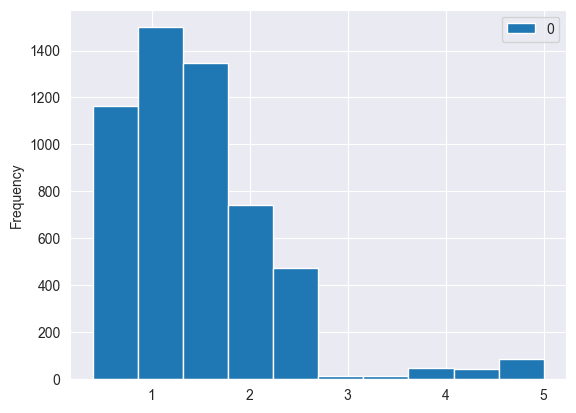

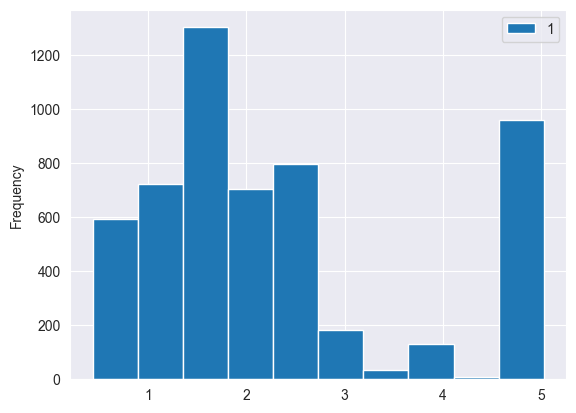

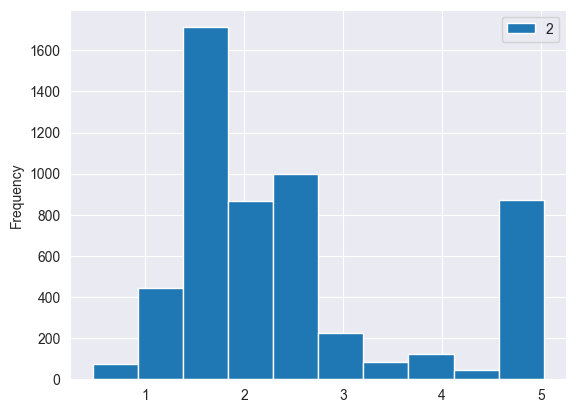

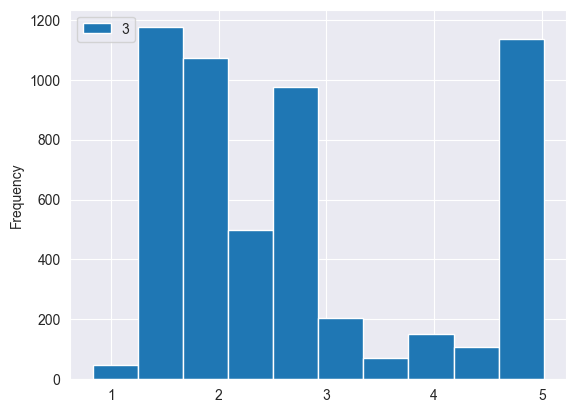

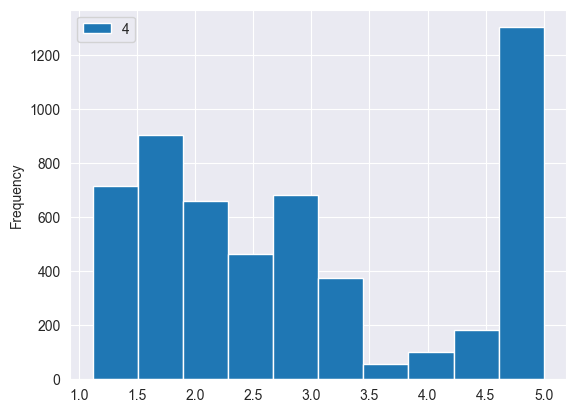

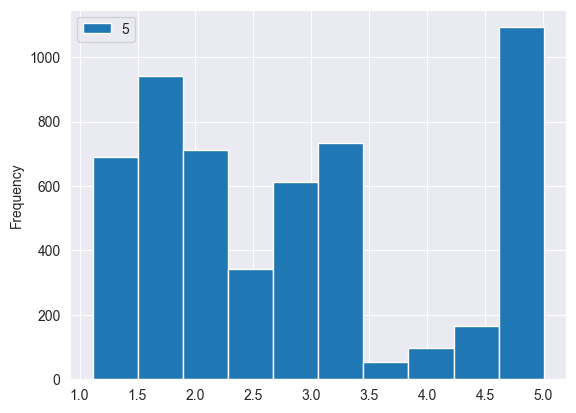

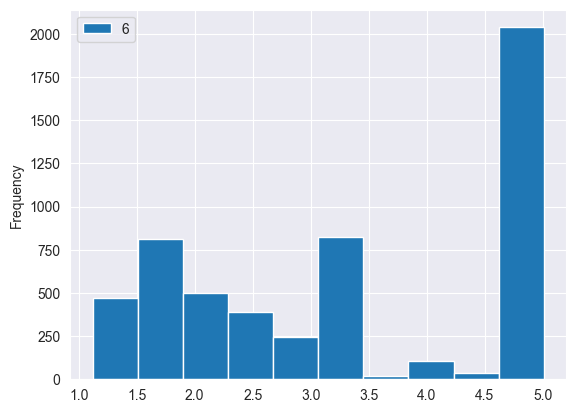

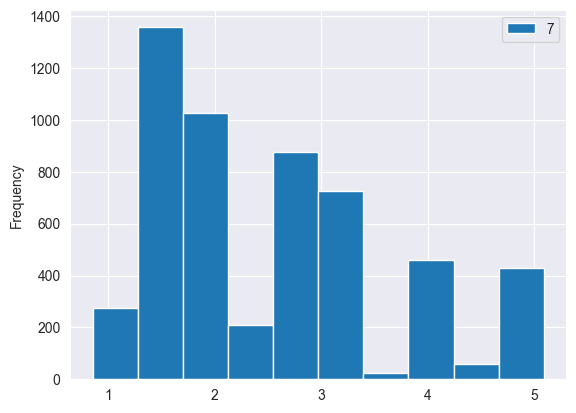

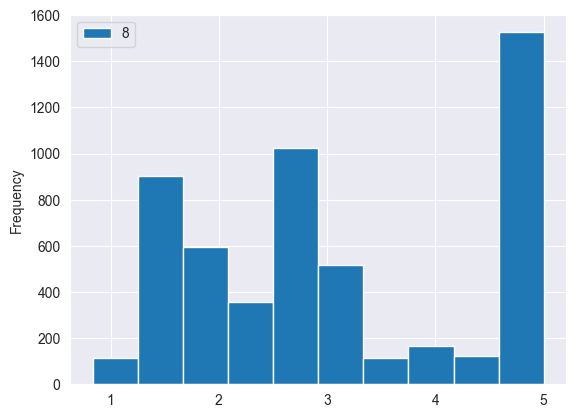

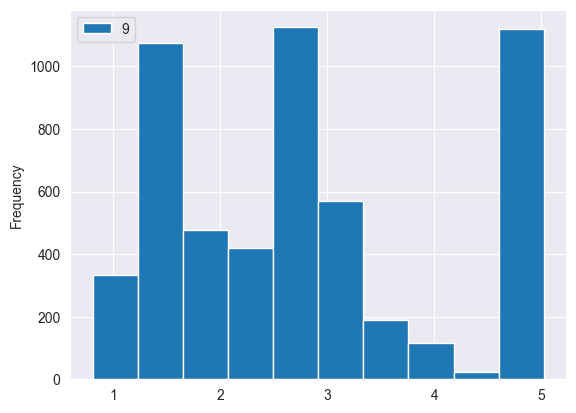

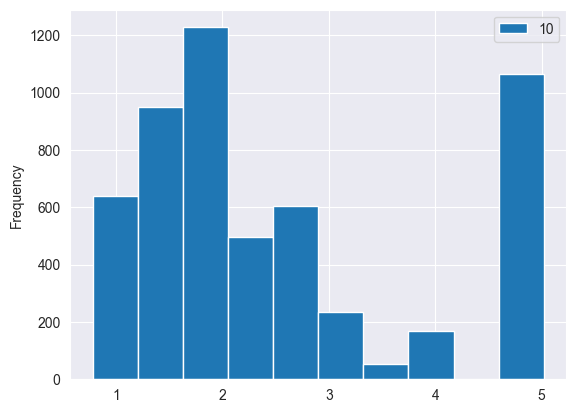

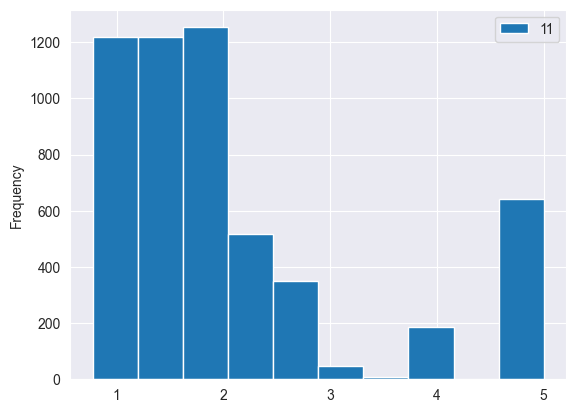

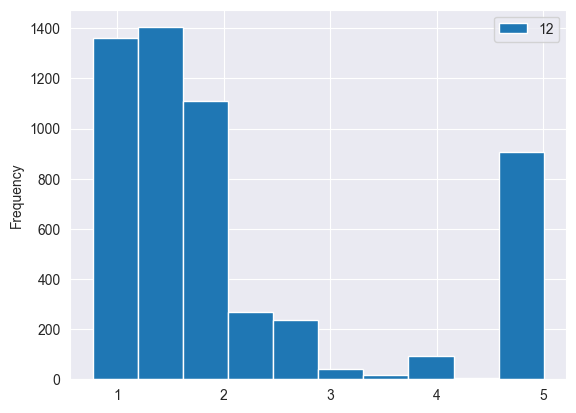

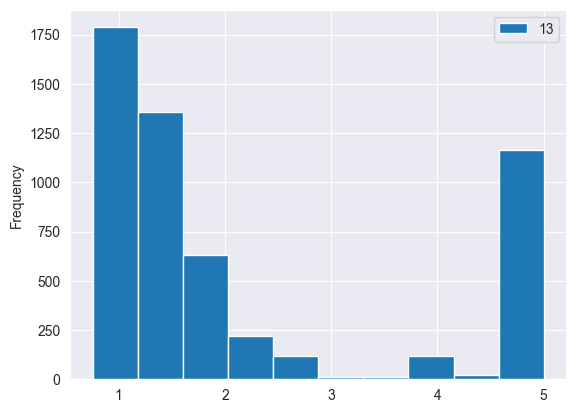

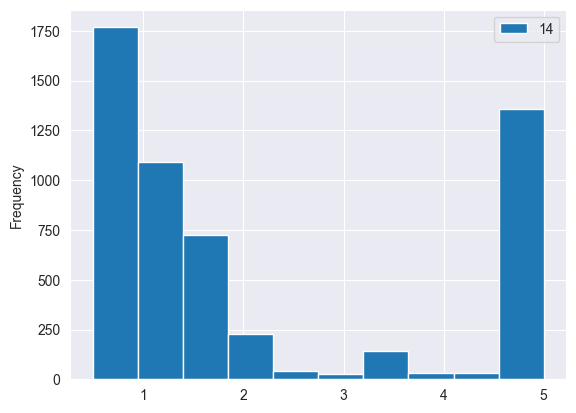

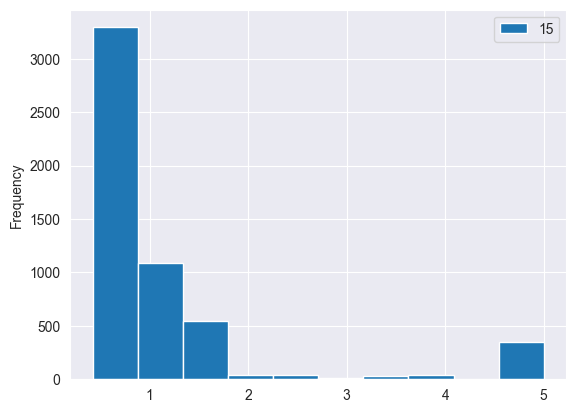

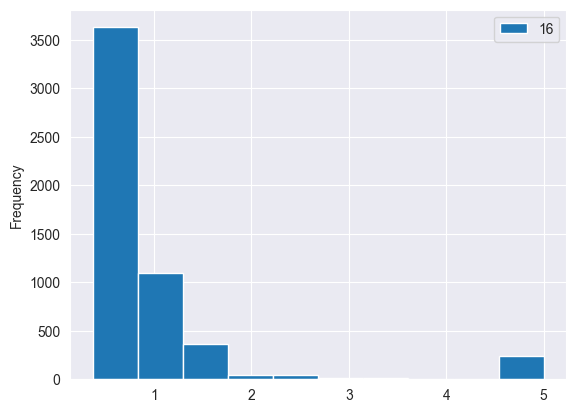

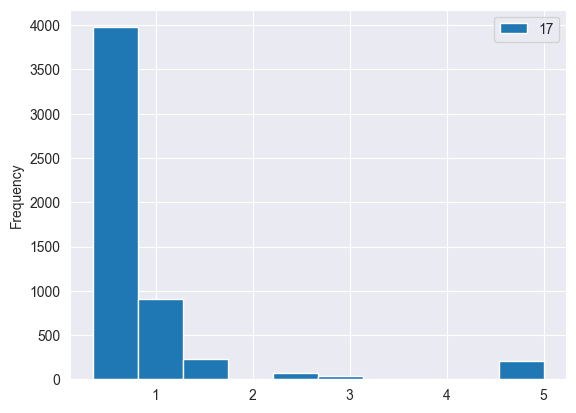

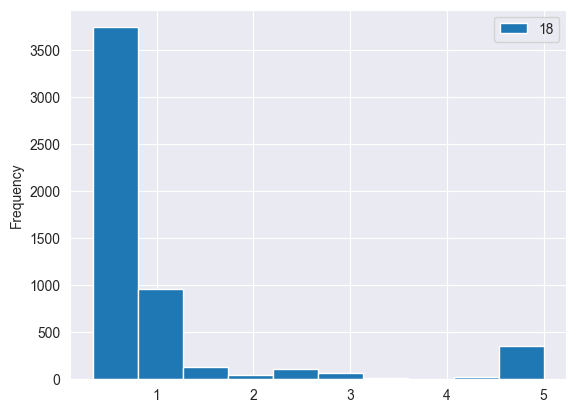

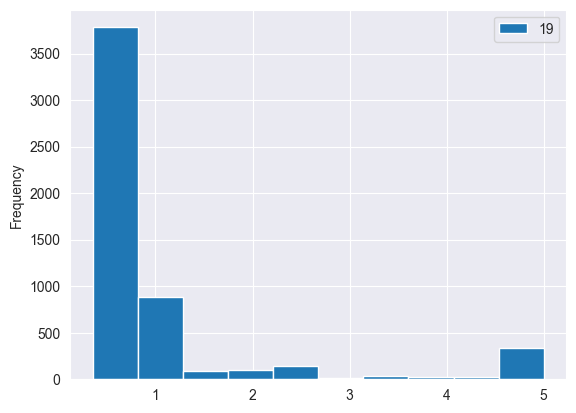

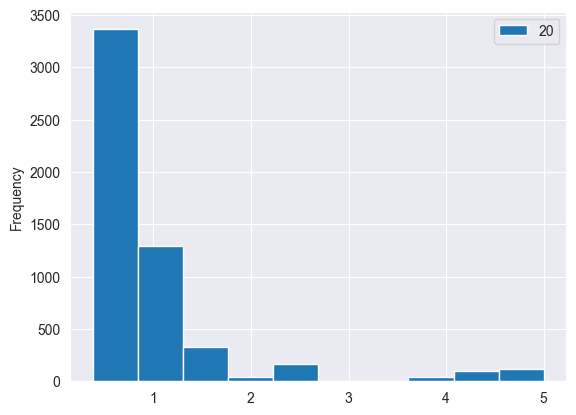

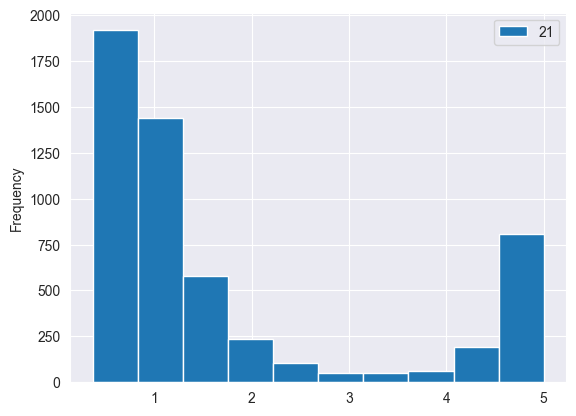

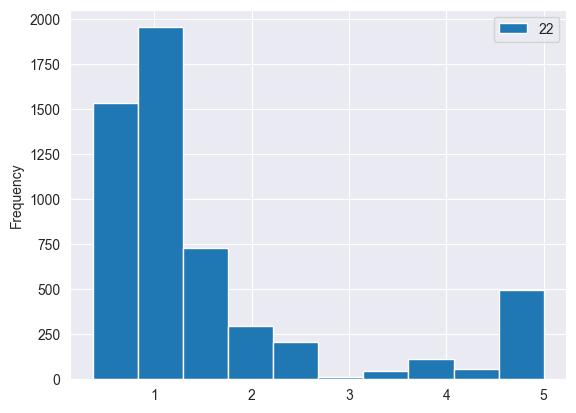

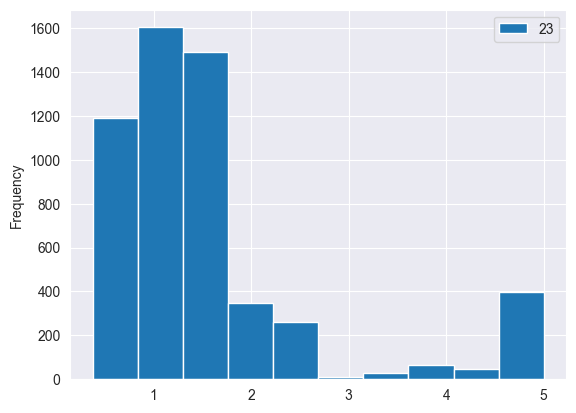

TypeError: no numeric data to plot

In [84]:
for i in dataset.columns:
    dataset[i].plot.hist( legend=True )
    pyplot.show()

In [ ]:
X = dataset.drop(["labels"], axis=1)
X.sample(10)

In [ ]:
encoder = LabelEncoder()
labels = encoder.fit_transform(dataset["labels"])
y = pandas.DataFrame(labels)
y.sample(10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
minmax_scaler = MinMaxScaler()
X_train = pandas.DataFrame(minmax_scaler.fit_transform(X_train))
X_test = pandas.DataFrame(minmax_scaler.transform(X_test))
X_train.sample(10)

In [ ]:
knn = {}
lgr = {}
frst = {}
hgb = {}
svc = {}

In [ ]:
def knnTrainAndFit(X_train, X_test, y_train, y_test, k=0):

    if k == 0:
        k = int( (len(y_train) + len(y_test)) ** 0.5 )

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    fone = metrics.f1_score(y_test, y_pred)

    return {
        "K" : k,
        "ACC" : acc,
        "F1" : fone,
        "REC" : rec,
        "PREC" : prec,
    }

def lgRegressorTrainAndFit(X_train, X_test, y_train, y_test):

    lg = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=77)
    lg.fit(X_train, y_train)

    y_pred = lg.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    fone = metrics.f1_score(y_test, y_pred)

    return {
        "ACC" : acc,
        "F1" : fone,
        "REC" : rec,
        "PREC" : prec,
    }

def forestTrainAndFit(X_train, X_test, y_train, y_test, estimators, depth, impurity):

    forest = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=42,
                                    verbose=0,class_weight="balanced", min_impurity_decrease=impurity)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_test)
    probs = forest.predict_proba(X_test)

    auc = metrics.roc_auc_score(y_test, probs[:,1])
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    fone = metrics.f1_score(y_test, y_pred)

    return {
        "ESTIM" : estimators,
        "DEPTH" : depth,
        "IMPURITY" : impurity,
        "ACC" : acc,
        "F1" : fone,
        "REC" : rec,
        "PREC" : prec,
        "AUC" : auc
    }

def hgboostTrainAndFit(X_train, X_test, y_train, y_test, depth):

    hg = HistGradientBoostingClassifier(max_depth=depth, random_state=77)
    hg.fit(X_train, y_train)

    y_pred = hg.predict(X_test)
    probs = hg.predict_proba(X_test)

    auc = metrics.roc_auc_score(y_test, probs[:,1])
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    fone = metrics.f1_score(y_test, y_pred)

    return {
        "DEPTH" : depth,
        "ACC" : acc,
        "F1" : fone,
        "REC" : rec,
        "PREC" : prec,
        "AUC" : auc
    }

In [ ]:
lgrTrainedNorm = lgRegressorTrainAndFit(X_train, X_test, y_train, y_test)
lgr['norm'] = lgrTrainedNorm
lgr

In [ ]:
knnNormTraining = []
knnScaledTraining = []
for i in range(20):
    knnNormTraining.append(knnTrainAndFit(X_train, X_test, y_train, y_test, i))

In [ ]:
hgbNormTraining = []
hgbScaledTraining = []
for i in range(1, 20):
    hgbNormTraining.append(hgboostTrainAndFit(X_train, X_test, y_train, y_test, i))

In [ ]:
frstNormTraining = []
frstScaledTraining = []
for i in range(1, 100, 5):
    frstNormTraining.append(forestTrainAndFit(X_train, X_test, y_train, y_test, i, 5, 0.00001))

In [ ]:
for i in range(1, 25):
    frstNormTraining.append(forestTrainAndFit(X_train, X_test, y_train, y_test, 41, i, 0.00001))